# Analysis of Netflix Stock Prices between 2013 and 2017 

In this Python 3 notebook I set out to analyse the Stock prices for Netflix.
The data, can be found here:
http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html

Import the required libraries that we are going to use.

In [296]:
import os.path
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Data Identification and Collection:

Read the html tables from the link provided in the assignment.

In [297]:
NFLX13 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[0]
NFLX14 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[1]
NFLX15 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[2]
NFLX16 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[3]
NFLX17 = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html")[4]

Check to make sure that the data is stored correctly in the dataframes. 

In [298]:
NFLX13.head(10)

,Day,Month,Year,Open,High,Low,Close
0,2,1,2013,13.601429,13.687143,12.955714,13.144286
1,3,1,2013,13.138572,13.988571,13.075714,13.798572
2,4,1,2013,13.791429,13.958571,13.648571,13.711429
3,7,1,2013,13.770000,14.535714,13.731428,14.171429
4,8,1,2013,14.287143,14.427143,13.828571,13.880000
5,9,1,2013,13.874286,13.992857,13.507143,13.701428
6,10,1,2013,13.795714,14.274285,13.671429,14.000000
7,11,1,2013,14.025714,14.560000,14.000000,14.470000
8,14,1,2013,14.427143,14.928572,14.365714,14.778571
9,15,1,2013,14.717143,14.908571,14.435715,14.527143


In [299]:
NFLX17.tail(10)

,Day,Month,Year,Open,High,Low,Close
241,15,12,2017,189.610001,191.429993,188.009995,190.119995
242,18,12,2017,191.199997,191.649994,188.899994,190.419998
243,19,12,2017,190.179993,190.300003,185.750000,187.020004
244,20,12,2017,187.940002,189.110001,185.259995,188.820007
245,21,12,2017,189.440002,190.949997,187.580002,188.619995
246,22,12,2017,188.330002,190.949997,186.800003,189.940002
247,26,12,2017,189.779999,189.940002,186.399994,187.759995
248,27,12,2017,187.800003,188.100006,185.220001,186.240005
249,28,12,2017,187.179993,194.490005,186.850006,192.710007
250,29,12,2017,192.509995,193.949997,191.220001,191.960007


Already we can see just how high the stocks have risen in price since 2013.

Now lets try and see if there is any issues with the data which we have obtained

In [300]:
NFLX13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Day      252 non-null int64
Month    252 non-null int64
Year     252 non-null int64
Open     252 non-null float64
High     252 non-null float64
Low      252 non-null float64
Close    252 non-null float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [301]:
NFLX14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Day      252 non-null int64
Month    252 non-null int64
Year     252 non-null int64
Open     252 non-null float64
High     252 non-null float64
Low      252 non-null float64
Close    252 non-null float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [302]:
NFLX15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Day      252 non-null int64
Month    252 non-null int64
Year     252 non-null int64
Open     252 non-null float64
High     252 non-null float64
Low      252 non-null float64
Close    252 non-null float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [303]:
NFLX16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Day      252 non-null int64
Month    252 non-null int64
Year     252 non-null int64
Open     252 non-null float64
High     252 non-null float64
Low      252 non-null float64
Close    252 non-null float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [304]:
NFLX17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Day      251 non-null int64
Month    251 non-null int64
Year     251 non-null int64
Open     251 non-null float64
High     251 non-null float64
Low      251 non-null float64
Close    251 non-null float64
dtypes: float64(4), int64(3)
memory usage: 13.8 KB


Everything looks in order, but 2013-2016 all have 252 trading days,however 2017 only has 251. Is there a reason for this or is there just some values missing?

In [305]:
NFLX17.isnull().sum()

Day      0
Month    0
Year     0
Open     0
High     0
Low      0
Close    0
dtype: int64

There is no values missing, which would imply that there is some valid reason for this.

Reason:
The stock market usually trades 252 days a year. 365/(5/7) working days = 260.71, but it is also closed an additional 9 days for holidays (eg bank holidays) 260.71-9 = 251.71  ~ 252 Days.

However if you look at 2017, you will see it only opened for 251 days, this is just down to the way the calender fell, as an extra holiday fell on a weekday instead of a weekend. 
"There were two shortened trading sessions: on Monday, July 3, the day before Independence Day, and on Friday, November 24, the day following Thanksgiving Day."

## Processing:

We have obtained the data but now we must change it into something which we can work with to make findings.

First things first we must join our five dataframes into one.

In [306]:
NFLX = pd.concat([NFLX13,NFLX14,NFLX15,NFLX16,NFLX17], axis=0)

I must then reset the index to prevent 5 rows having the same index number 

In [307]:
NFLX = NFLX.reset_index()

Once it is reindexed I can drop the old index column.

In [308]:
NFLX.drop(NFLX.columns[0], axis=1, inplace=True)

In [309]:
NFLX.head(10)

,Day,Month,Year,Open,High,Low,Close
0,2,1,2013,13.601429,13.687143,12.955714,13.144286
1,3,1,2013,13.138572,13.988571,13.075714,13.798572
2,4,1,2013,13.791429,13.958571,13.648571,13.711429
3,7,1,2013,13.770000,14.535714,13.731428,14.171429
4,8,1,2013,14.287143,14.427143,13.828571,13.880000
5,9,1,2013,13.874286,13.992857,13.507143,13.701428
6,10,1,2013,13.795714,14.274285,13.671429,14.000000
7,11,1,2013,14.025714,14.560000,14.000000,14.470000
8,14,1,2013,14.427143,14.928572,14.365714,14.778571
9,15,1,2013,14.717143,14.908571,14.435715,14.527143


In [310]:
NFLX.tail(10)

,Day,Month,Year,Open,High,Low,Close
1249,15,12,2017,189.610001,191.429993,188.009995,190.119995
1250,18,12,2017,191.199997,191.649994,188.899994,190.419998
1251,19,12,2017,190.179993,190.300003,185.750000,187.020004
1252,20,12,2017,187.940002,189.110001,185.259995,188.820007
1253,21,12,2017,189.440002,190.949997,187.580002,188.619995
1254,22,12,2017,188.330002,190.949997,186.800003,189.940002
1255,26,12,2017,189.779999,189.940002,186.399994,187.759995
1256,27,12,2017,187.800003,188.100006,185.220001,186.240005
1257,28,12,2017,187.179993,194.490005,186.850006,192.710007
1258,29,12,2017,192.509995,193.949997,191.220001,191.960007


Looks good but I need to convert the 'Day','Month' and 'Year' columns into just one 'Date' column

In [311]:
NFLX['Date'] = pd.to_datetime((NFLX['Year']*10000+NFLX['Month']*100+NFLX['Day']).apply(str),format='%Y%m%d')

I can the drop the old columns as I wont need them in the future, making them redundant.

In [312]:
NFLX.drop(NFLX.columns[[0,1,2]], axis=1, inplace=True)

Once their droped, move the column 'Date' to the start.

In [313]:
NFLX = NFLX.reindex(columns=['Date'] + NFLX.columns[:-1].tolist())

In [314]:
NFLX.head()

,Date,Open,High,Low,Close
0,2013-01-02,13.601429,13.687143,12.955714,13.144286
1,2013-01-03,13.138572,13.988571,13.075714,13.798572
2,2013-01-04,13.791429,13.958571,13.648571,13.711429
3,2013-01-07,13.770000,14.535714,13.731428,14.171429
4,2013-01-08,14.287143,14.427143,13.828571,13.880000


Create a new column called 'Day' which will hold the weekday name for each date

In [315]:
NFLX['Day'] = NFLX['Date'].dt.weekday_name

In [316]:
cols = NFLX.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [317]:
NFLX = NFLX[cols]

In [318]:
NFLX.head(10)

,Day,Date,Open,High,Low,Close
0,Wednesday,2013-01-02,13.601429,13.687143,12.955714,13.144286
1,Thursday,2013-01-03,13.138572,13.988571,13.075714,13.798572
2,Friday,2013-01-04,13.791429,13.958571,13.648571,13.711429
3,Monday,2013-01-07,13.770000,14.535714,13.731428,14.171429
4,Tuesday,2013-01-08,14.287143,14.427143,13.828571,13.880000
5,Wednesday,2013-01-09,13.874286,13.992857,13.507143,13.701428
6,Thursday,2013-01-10,13.795714,14.274285,13.671429,14.000000
7,Friday,2013-01-11,14.025714,14.560000,14.000000,14.470000
8,Monday,2013-01-14,14.427143,14.928572,14.365714,14.778571
9,Tuesday,2013-01-15,14.717143,14.908571,14.435715,14.527143


Make the 'Date' column the same, as all rows will have a unique date.

In [319]:
NFLX = NFLX.set_index('Date')

Now is the time to add in new columns which may be useful in the future.

In [320]:
NFLX['Average'] = (NFLX['High'] + NFLX['Low'])/2

This column will show the average stock price (between the Highest price and the Lowest price). There are many averages which could have been computed (open and close), but I choose this one as it gives investors a good idea of wether or not they got a good deal.
Buyers will want to buy below this average, and Sellers will want to sell above this average.
It should be noted that the Highest price may only exist for a few minutes in a day so in order for a Seller to get this price  they must sell within that small time period, vise versa for the Lowest price and Buyers.
Ideally I would have the stock prices throughout a day, this would give me a more accurate average for each day.

In [321]:
NFLX['%Change'] = NFLX['Close'].pct_change()*100

This column contains the %change of the stock price from the previous day's close, (eg Day 1 Close = 10, Day 2 Close = 9.7, %Change = -3%)
This also shows the direction of the change (eg. Positive and Negative), when I average this it will affect the answers I get.I want to find which day of the week is the most active day for the Netflix stock. For this I must create a new column called 'Activity' which will contain the '%Change' in positive form only. (eg. -1% = 1%)

But before I do this check to see is there is any errors with the '%Change' column 

In [322]:
NFLX[NFLX['%Change'].isnull()]

,Day,Open,High,Low,Close,Average,%Change
Date,,,,,,,
2013-01-02,Wednesday,13.601429,13.687143,12.955714,13.144286,13.321428,NaN


This is the only row which doesn't have a %Change element, the simple reason for this is that we dont have the previous day's closing value in our dataframe.  

Now create the Activity Column

In [323]:
NFLX['Activity'] = NFLX['%Change'].abs()

In [324]:
NFLX.head(10)

,Day,Open,High,Low,Close,Average,%Change,Activity
Date,,,,,,,,
2013-01-02,Wednesday,13.601429,13.687143,12.955714,13.144286,13.321428,NaN,NaN
2013-01-03,Thursday,13.138572,13.988571,13.075714,13.798572,13.532142,4.977722,4.977722
2013-01-04,Friday,13.791429,13.958571,13.648571,13.711429,13.803571,-0.631536,0.631536
2013-01-07,Monday,13.770000,14.535714,13.731428,14.171429,14.133571,3.354865,3.354865
2013-01-08,Tuesday,14.287143,14.427143,13.828571,13.880000,14.127857,-2.056455,2.056455
2013-01-09,Wednesday,13.874286,13.992857,13.507143,13.701428,13.750000,-1.286542,1.286542
2013-01-10,Thursday,13.795714,14.274285,13.671429,14.000000,13.972857,2.179131,2.179131
2013-01-11,Friday,14.025714,14.560000,14.000000,14.470000,14.280000,3.357143,3.357143
2013-01-14,Monday,14.427143,14.928572,14.365714,14.778571,14.647143,2.132488,2.132488


Everything looks good to go, now its time to analysis it. 

### Analysis:

In [325]:
openedHigher = len(NFLX.loc[NFLX['Open'] > NFLX['Close'].shift()])
openedLower = len(NFLX.loc[NFLX['Open'] < NFLX['Close'].shift()])
opened = [openedHigher,openedLower]

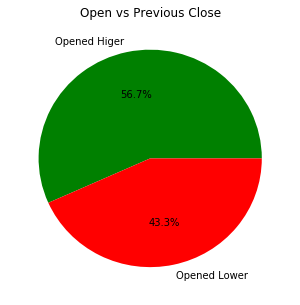

In [326]:
plt.figure(figsize=(5, 5))
plt.title('Open vs Previous Close')
p = plt.pie(opened,labels=["Opened Higer","Opened Lower"] ,colors=["green","red"], autopct="%.1f%%")

In [327]:
closedHigher = len(NFLX.loc[NFLX['Close'] > NFLX['Open']])
closedLower = len(NFLX.loc[NFLX['Close'] < NFLX['Open']])
closed = [closedHigher,closedLower]

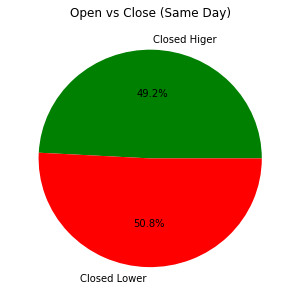

In [328]:
plt.figure(figsize=(5, 5))
plt.title('Open vs Close (Same Day)')
p = plt.pie(closed,labels=["Closed Higer","Closed Lower"] ,colors=["green","red"], autopct="%.1f%%")

##### Finding #1:

This is an interestinng finding as it appears that the majority of the time which the Netflix stock price experiences growth is when the market is closed.

In [329]:
weeklyActivity = NFLX[np.isfinite(NFLX['Activity'])]

mondayActivity = weeklyActivity.loc[NFLX['Day'] == 'Monday', 'Activity'].sum()
mondayActivity = mondayActivity/len(weeklyActivity.loc[NFLX['Day'] == 'Monday'])

tuesdayActivity = weeklyActivity.loc[NFLX['Day'] == 'Tuesday', 'Activity'].sum()
tuesdayActivity = tuesdayActivity/len(weeklyActivity.loc[NFLX['Day'] == 'Tuesday'])

wednesdayActivity = weeklyActivity.loc[NFLX['Day'] == 'Wednesday', 'Activity'].sum()
wednesdayActivity = wednesdayActivity/len(weeklyActivity.loc[NFLX['Day'] == 'Wednesday'])

thursdayActivity = weeklyActivity.loc[NFLX['Day'] == 'Thursday', 'Activity'].sum()
thursdayActivity = thursdayActivity/len(weeklyActivity.loc[NFLX['Day'] == 'Thursday'])

fridayActivity = weeklyActivity.loc[NFLX['Day'] == 'Friday', 'Activity'].sum()
fridayActivity = fridayActivity/len(weeklyActivity.loc[NFLX['Day'] == 'Friday'])

dailyActivity = [mondayActivity,tuesdayActivity,wednesdayActivity,thursdayActivity,fridayActivity]
dailyActivity = np.array(dailyActivity)

In [330]:
weeklyChange = NFLX[np.isfinite(NFLX['%Change'])]

mondayChange = weeklyChange.loc[NFLX['Day'] == 'Monday', '%Change'].sum()
mondayChange = mondayChange/len(weeklyChange.loc[NFLX['Day'] == 'Monday'])

tuesdayChange = weeklyChange.loc[NFLX['Day'] == 'Tuesday', '%Change'].sum()
tuesdayChange = tuesdayChange/len(weeklyChange.loc[NFLX['Day'] == 'Tuesday'])

wednesdayChange = weeklyChange.loc[NFLX['Day'] == 'Wednesday', '%Change'].sum()
wednesdayChange = wednesdayChange/len(weeklyChange.loc[NFLX['Day'] == 'Wednesday'])

thursdayChange = weeklyChange.loc[NFLX['Day'] == 'Thursday', '%Change'].sum()
thursdayChange = thursdayChange/len(weeklyChange.loc[NFLX['Day'] == 'Thursday'])

fridayChange = weeklyChange.loc[NFLX['Day'] == 'Friday', '%Change'].sum()
fridayChange = fridayChange/len(weeklyChange.loc[NFLX['Day'] == 'Friday'])

dailyChange = [mondayChange,tuesdayChange,wednesdayChange,thursdayChange,fridayChange]
dailyChange = np.array(dailyChange)

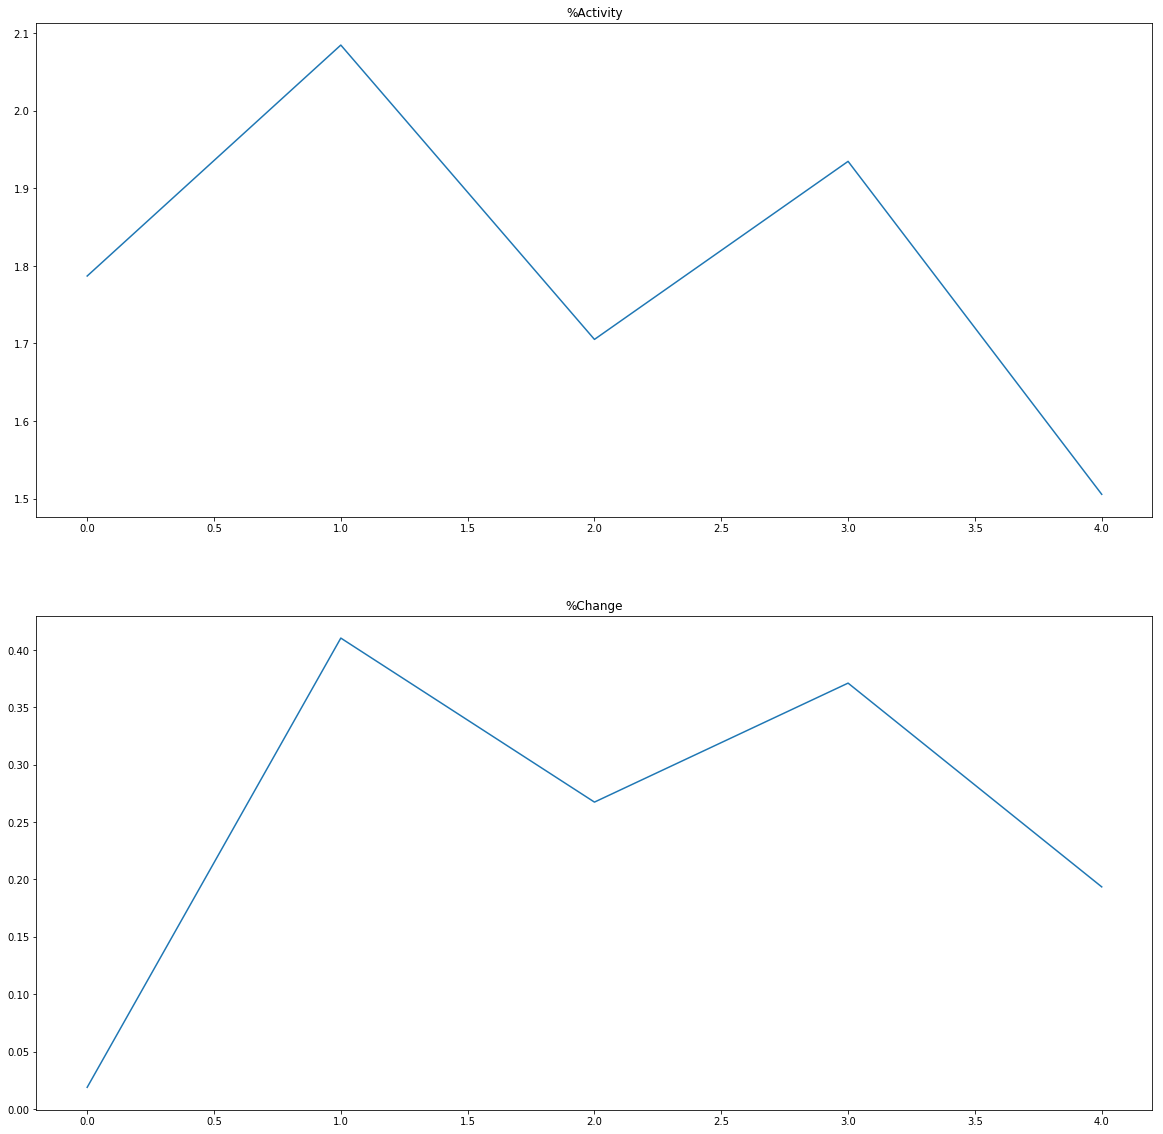

In [331]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 1, 1)
plt.plot(dailyActivity)
plt.title('%Activity')

plt.subplot(2, 1, 2)
plt.plot(dailyChange)
plt.title('%Change')

plt.show()

##### Finding #2:

Tuesday and Thursday are the most Active days, as the Netfilx stock price experiences most of its fluctuation on those days. Monday is the Third most Active day. 

##### Finding #3:

When we replace the Active column with the '%Change' column for this graph, we come accross another iteresting finding. That Moday is the least positive day of the week for the Netflix stock price, with Friday being the next worst.

When I researched this more, I came accross a term used by traders called the 'Moday Effect'.
"The belief that securities market returns on Mondays are less than the other days of the week, and are often negative on average."
So if the stock experiences a drop on Friday it will continue right through the weekend and up until Monday, before it begins to experience growth again.
It was interesting to discover an actual theory used by traders, so evident in my findings.

If anything, I belive this makes Finding 1 all the more suprising. 
Since the Netflix stock sees the majority of its growth when the market is closed, I would have believe that it would see a large chunk of this growth would be during the weekend (as the weekend is the longest period of the week where the market is closed) but this is not the case.

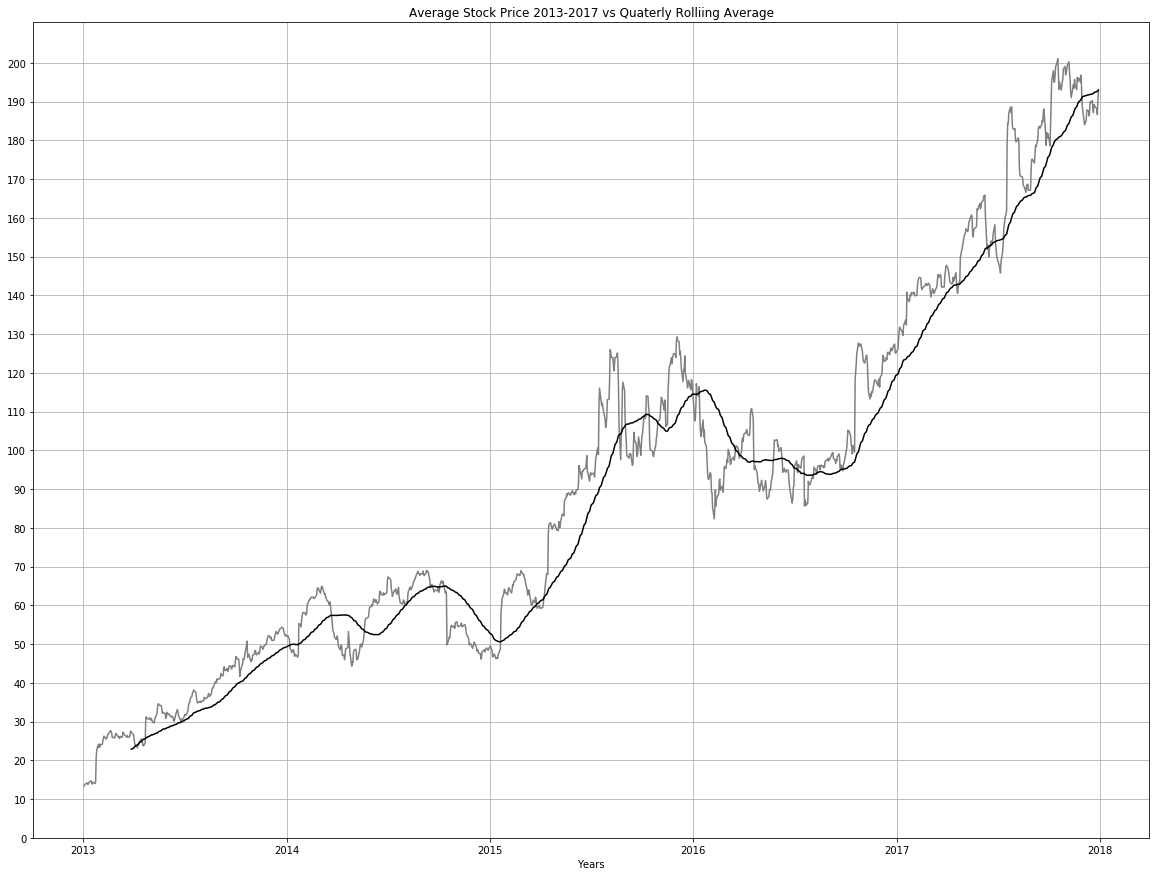

In [332]:
plt.figure(figsize=(20,15))
ara = NFLX['Average'].rolling(60).mean()
plt.plot(NFLX['Average'],color='grey')
plt.plot(ara,color='black')
plt.xlabel('Years')
plt.yticks(np.arange(0, max(NFLX['Average'])+1, 10))
plt.grid()
plt.title('Average Stock Price 2013-2017 vs Quaterly Rolliing Average')
plt.show()

This graph shows the growth of the Netflix stock over the last 5 years. Again I used the 'Average' figures to display the stocks growth over the years.

In this graph I have also plotted the rolling quaterly average (60 days, as there is roughly 60 days in a yearly quater).
This market has been a very 'bullish' market, which means that it has risen steadily over the years. (Bear expects it to drop, a Bull expects it to rise.)

In hindsight it appears that 2016 was a good year to invest in the stock, as the price reached lows that its rolling average suggests it should not have, particularly in the middle of the first quater of that year.

This graph also shows that there has been multiple good times to sell the stock, (eg the end of 2015, as when the rolling average began to drop, the average price continued to rise.)

Going by the graph, and the most recent data we have, it seems it is a good time to buy this stock. But it al depends on wether you are a bear or a bull. 

##### Returns On Investment (ROC)

In [333]:
overallROC = ((NFLX['Average'][-1]-NFLX['Average'][0])/NFLX['Average'][0])*100

In [334]:
print("Overall Return On Investment(ROC): ",overallROC,"%")

Overall Return On Investment(ROC):  1345.67828443 %


This figure is impressive, If you bought shares in Neflix at the start of 2013 and decide to sell them now you would see 13 times your original ivestment returned to you.

Lets take a closer look at ROC.

In [335]:
Q12013 = NFLX.loc[(NFLX.index.year==2013)&(NFLX.index.month<=3),['Average']]
Q12014 = NFLX.loc[(NFLX.index.year==2014)&(NFLX.index.month<=3),['Average']]
Q12015 = NFLX.loc[(NFLX.index.year==2015)&(NFLX.index.month<=3),['Average']]
Q12016 = NFLX.loc[(NFLX.index.year==2016)&(NFLX.index.month<=3),['Average']]
Q12017 = NFLX.loc[(NFLX.index.year==2017)&(NFLX.index.month<=3),['Average']]

Q22013 = NFLX.loc[(NFLX.index.year==2013)&(NFLX.index.month>3)&(NFLX.index.month<=6),['Average']]
Q22014 = NFLX.loc[(NFLX.index.year==2014)&(NFLX.index.month>3)&(NFLX.index.month<=6),['Average']]
Q22015 = NFLX.loc[(NFLX.index.year==2015)&(NFLX.index.month>3)&(NFLX.index.month<=6),['Average']]
Q22016 = NFLX.loc[(NFLX.index.year==2016)&(NFLX.index.month>3)&(NFLX.index.month<=6),['Average']]
Q22017 = NFLX.loc[(NFLX.index.year==2017)&(NFLX.index.month>3)&(NFLX.index.month<=6),['Average']]

Q32013 = NFLX.loc[(NFLX.index.year==2013)&(NFLX.index.month>6)&(NFLX.index.month<=9),['Average']]
Q32014 = NFLX.loc[(NFLX.index.year==2014)&(NFLX.index.month>6)&(NFLX.index.month<=9),['Average']]
Q32015 = NFLX.loc[(NFLX.index.year==2015)&(NFLX.index.month>6)&(NFLX.index.month<=9),['Average']]
Q32016 = NFLX.loc[(NFLX.index.year==2016)&(NFLX.index.month>6)&(NFLX.index.month<=9),['Average']]
Q32017 = NFLX.loc[(NFLX.index.year==2017)&(NFLX.index.month>6)&(NFLX.index.month<=9),['Average']]

Q42013 = NFLX.loc[(NFLX.index.year==2013)&(NFLX.index.month>9)&(NFLX.index.month<=12),['Average']]
Q42014 = NFLX.loc[(NFLX.index.year==2014)&(NFLX.index.month>9)&(NFLX.index.month<=12),['Average']]
Q42015 = NFLX.loc[(NFLX.index.year==2015)&(NFLX.index.month>9)&(NFLX.index.month<=12),['Average']]
Q42016 = NFLX.loc[(NFLX.index.year==2016)&(NFLX.index.month>9)&(NFLX.index.month<=12),['Average']]
Q42017 = NFLX.loc[(NFLX.index.year==2017)&(NFLX.index.month>9)&(NFLX.index.month<=12),['Average']]

In [336]:
Q12013ROC = ((Q12013['Average'][-1]-Q12013['Average'][0])/(Q12013['Average'][0])*100)
Q12014ROC = ((Q12014['Average'][-1]-Q12014['Average'][0])/(Q12014['Average'][0])*100)
Q12015ROC = ((Q12015['Average'][-1]-Q12015['Average'][0])/(Q12015['Average'][0])*100)
Q12016ROC = ((Q12016['Average'][-1]-Q12016['Average'][0])/(Q12016['Average'][0])*100)
Q12017ROC = ((Q12017['Average'][-1]-Q12017['Average'][0])/(Q12017['Average'][0])*100)

Q22013ROC = ((Q22013['Average'][-1]-Q22013['Average'][0])/(Q22013['Average'][0])*100)
Q22014ROC = ((Q22014['Average'][-1]-Q22014['Average'][0])/(Q22014['Average'][0])*100)
Q22015ROC = ((Q22015['Average'][-1]-Q22015['Average'][0])/(Q22015['Average'][0])*100)
Q22016ROC = ((Q22016['Average'][-1]-Q22016['Average'][0])/(Q22016['Average'][0])*100)
Q22017ROC = ((Q22017['Average'][-1]-Q22017['Average'][0])/(Q22017['Average'][0])*100)

Q32013ROC = ((Q32013['Average'][-1]-Q32013['Average'][0])/(Q32013['Average'][0])*100)
Q32014ROC = ((Q32014['Average'][-1]-Q32014['Average'][0])/(Q32014['Average'][0])*100)
Q32015ROC = ((Q32015['Average'][-1]-Q32015['Average'][0])/(Q32015['Average'][0])*100)
Q32016ROC = ((Q32016['Average'][-1]-Q32016['Average'][0])/(Q32016['Average'][0])*100)
Q32017ROC = ((Q32017['Average'][-1]-Q32017['Average'][0])/(Q32017['Average'][0])*100)

Q42013ROC = ((Q42013['Average'][-1]-Q42013['Average'][0])/(Q42013['Average'][0])*100)
Q42014ROC = ((Q42014['Average'][-1]-Q42014['Average'][0])/(Q42014['Average'][0])*100)
Q42015ROC = ((Q42015['Average'][-1]-Q42015['Average'][0])/(Q42015['Average'][0])*100)
Q42016ROC = ((Q42016['Average'][-1]-Q42016['Average'][0])/(Q42016['Average'][0])*100)
Q42017ROC = ((Q42017['Average'][-1]-Q42017['Average'][0])/(Q42017['Average'][0])*100)

In [337]:
ROC2013 = Q12013ROC + Q22013ROC + Q32013ROC + Q42013ROC
ROC2014 = Q12014ROC + Q22014ROC + Q32014ROC + Q42014ROC
ROC2015 = Q12015ROC + Q22015ROC + Q32015ROC + Q42015ROC
ROC2016 = Q12016ROC + Q22016ROC + Q32016ROC + Q42016ROC
ROC2017 = Q12017ROC + Q22017ROC + Q32017ROC + Q42017ROC

In [338]:
Q1ROC = (Q12013ROC + Q12014ROC + Q12015ROC + Q12016ROC + Q12017ROC)/4
Q2ROC = (Q22013ROC + Q22014ROC + Q22015ROC + Q22016ROC + Q22017ROC)/4
Q3ROC = (Q32013ROC + Q32014ROC + Q32015ROC + Q32016ROC + Q32017ROC)/4
Q4ROC = (Q42013ROC + Q42014ROC + Q42015ROC + Q42016ROC + Q42017ROC)/4

In [339]:
print("Overall Return On Investment(ROC): ",overallROC,"%")

Overall Return On Investment(ROC):  1345.67828443 %


In [340]:
print(" 2013 ROC:",ROC2013,"%","\n","2014 ROC:",ROC2014,"%","\n","2015 ROC:",ROC2015,"%","\n","2016 ROC:",ROC2016,"%","\n","2017 ROC:",ROC2017,"%")

 2013 ROC: 174.763124993 % 
 2014 ROC: -2.85996682488 % 
 2015 ROC: 98.234458122 % 
 2016 ROC: 8.84721671102 % 
 2017 ROC: 48.7784970807 %


Netflix experienced its biggest growth in the year 2013. It appears that the stock performs well every second year

In [341]:
print(" Average Q1 ROC:",Q1ROC,"%","\n","Average Q2 ROC:",Q2ROC,"%","\n","Average Q3 ROC:",Q3ROC,"%","\n","Average Q4 ROC:",Q4ROC,"%")

 Average Q1 ROC: 34.0208560917 % 
 Average Q2 ROC: 21.2356696751 % 
 Average Q3 ROC: 17.8317544249 % 
 Average Q4 ROC: 8.85255232882 %


These figures would suggest that the is a steady decline in the ROC, the later the year goes on. But I dont fully trust these figures as I believe the 2013 quaters are effecting these big time.
Lets take a closer look at the breakdown of ROC.

In [342]:
s1 = pd.Series(['Q1', Q12013ROC, Q12014ROC, Q12015ROC, Q12016ROC, Q12017ROC])
s2 = pd.Series(['Q2', Q22013ROC, Q22014ROC, Q22015ROC, Q22016ROC, Q22017ROC])
s3 = pd.Series(['Q3', Q32013ROC, Q32014ROC, Q32015ROC, Q32016ROC, Q32017ROC])
s4 = pd.Series(['Q4', Q42013ROC, Q42014ROC, Q42015ROC, Q42016ROC, Q42017ROC])
quaterlyROCs = pd.DataFrame([list(s1), list(s2),list(s3), list(s4)],  columns =  ["Quater", "2013", "2014", "2015", "2016", "2017"])
quaterlyROCs = quaterlyROCs.set_index('Quater')
quaterlyROCs

,2013,2014,2015,2016,2017
Quater,,,,,
Q1,104.557642,-1.598067,21.009745,-4.939360,17.053465
Q2,14.312142,23.650260,57.940487,-12.791702,1.831491
Q3,41.163421,-2.367110,7.456791,2.356620,22.717296
Q4,14.729920,-22.545051,11.827435,24.221659,7.176246


I was hoping to find a trend into which quater was the strongest and why, but this claerly shows that there is no superior quater in terms of growth.

##### Finding #4:

However from this table we can pin-point the first quater of 2013 as the major growth quater of the NETFLX stock price.

Lets investigate further into each quater and see what effects their growth. (Comments are after all of the graphs below.)

##### First Quater

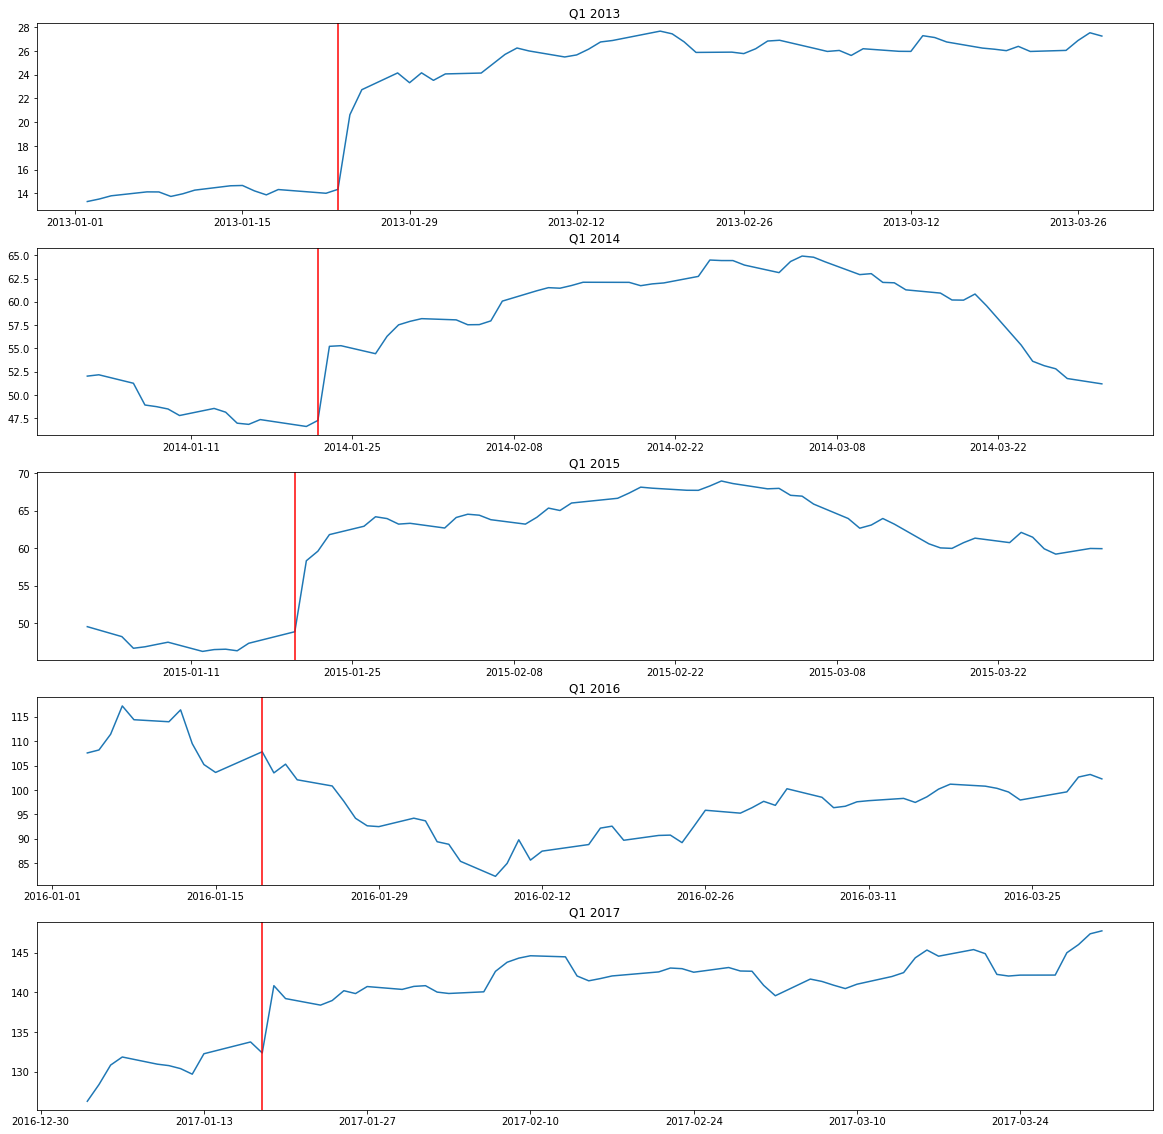

In [343]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5, 1, 1)
plt.plot(Q12013)
plt.title('Q1 2013')
plt.axvline(x="2013-01-23", color='r')

plt.subplot(5, 1, 2)
plt.plot(Q12014)
plt.title('Q1 2014')
plt.axvline(x="2014-01-22", color='r')

plt.subplot(5, 1, 3)
plt.plot(Q12015)
plt.title('Q1 2015')
plt.axvline(x="2015-01-20", color='r')

plt.subplot(5, 1, 4)
plt.plot(Q12016)
plt.title('Q1 2016')
plt.axvline(x="2016-01-19", color='r')

plt.subplot(5, 1, 5)
plt.plot(Q12017)
plt.title('Q1 2017')
plt.axvline(x="2017-01-18", color='r')

plt.show()

##### Second Quater

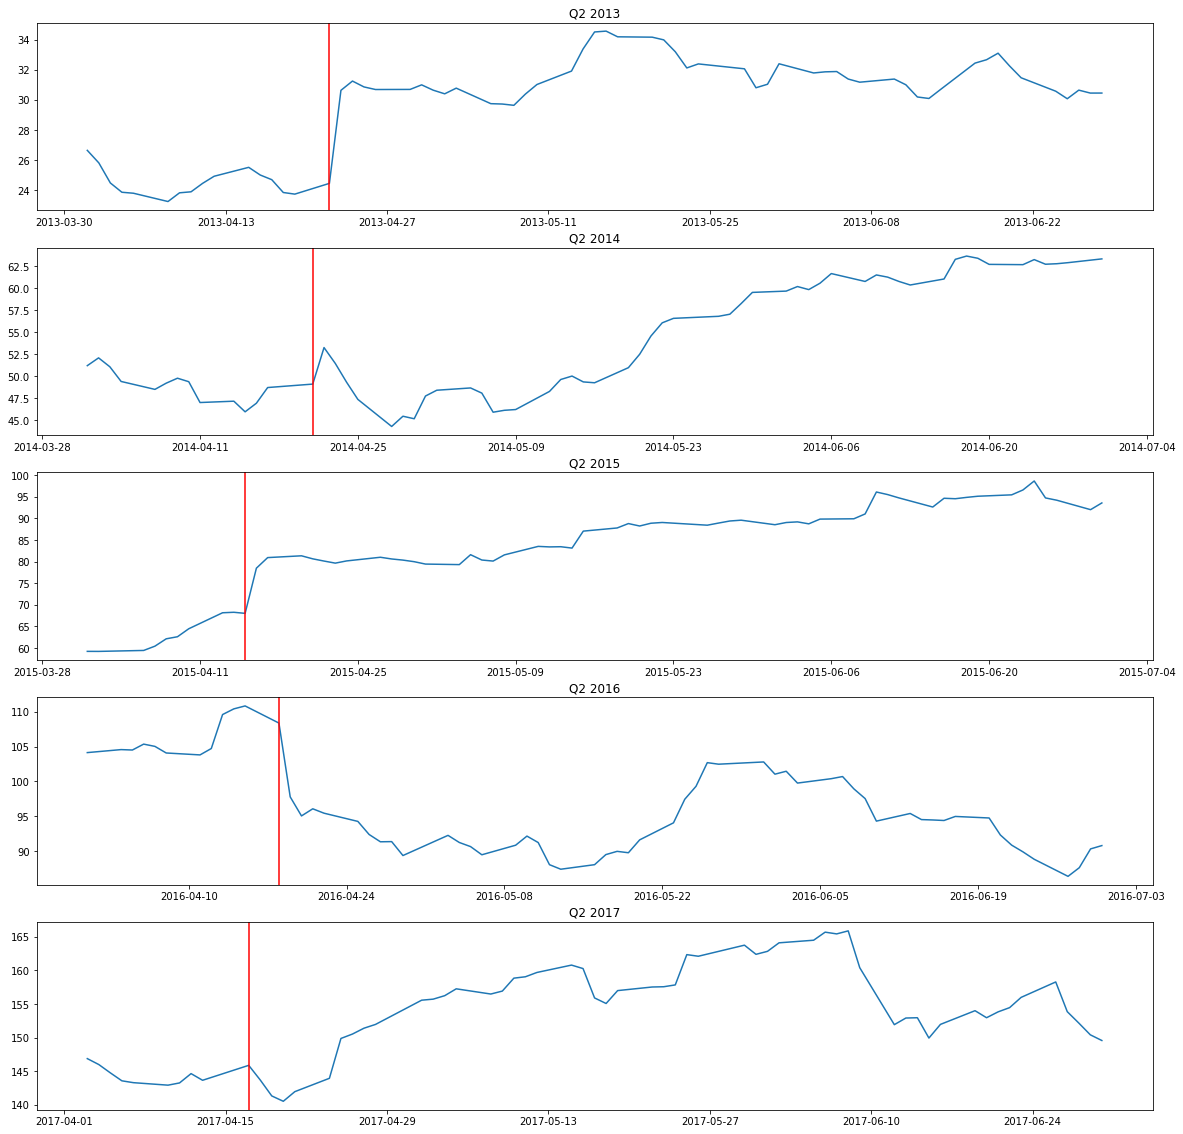

In [344]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5, 1, 1)
plt.plot(Q22013)
plt.title('Q2 2013')
plt.axvline(x="2013-04-22", color='r')

plt.subplot(5, 1, 2)
plt.plot(Q22014)
plt.title('Q2 2014')
plt.axvline(x="2014-04-21", color='r')

plt.subplot(5, 1, 3)
plt.plot(Q22015)
plt.title('Q2 2015')
plt.axvline(x="2015-04-15", color='r')

plt.subplot(5, 1, 4)
plt.plot(Q22016)
plt.title('Q2 2016')
plt.axvline(x="2016-04-18", color='r')

plt.subplot(5, 1, 5)
plt.plot(Q22017)
plt.title('Q2 2017')
plt.axvline(x="2017-04-17", color='r')

plt.show()

##### Third Quater

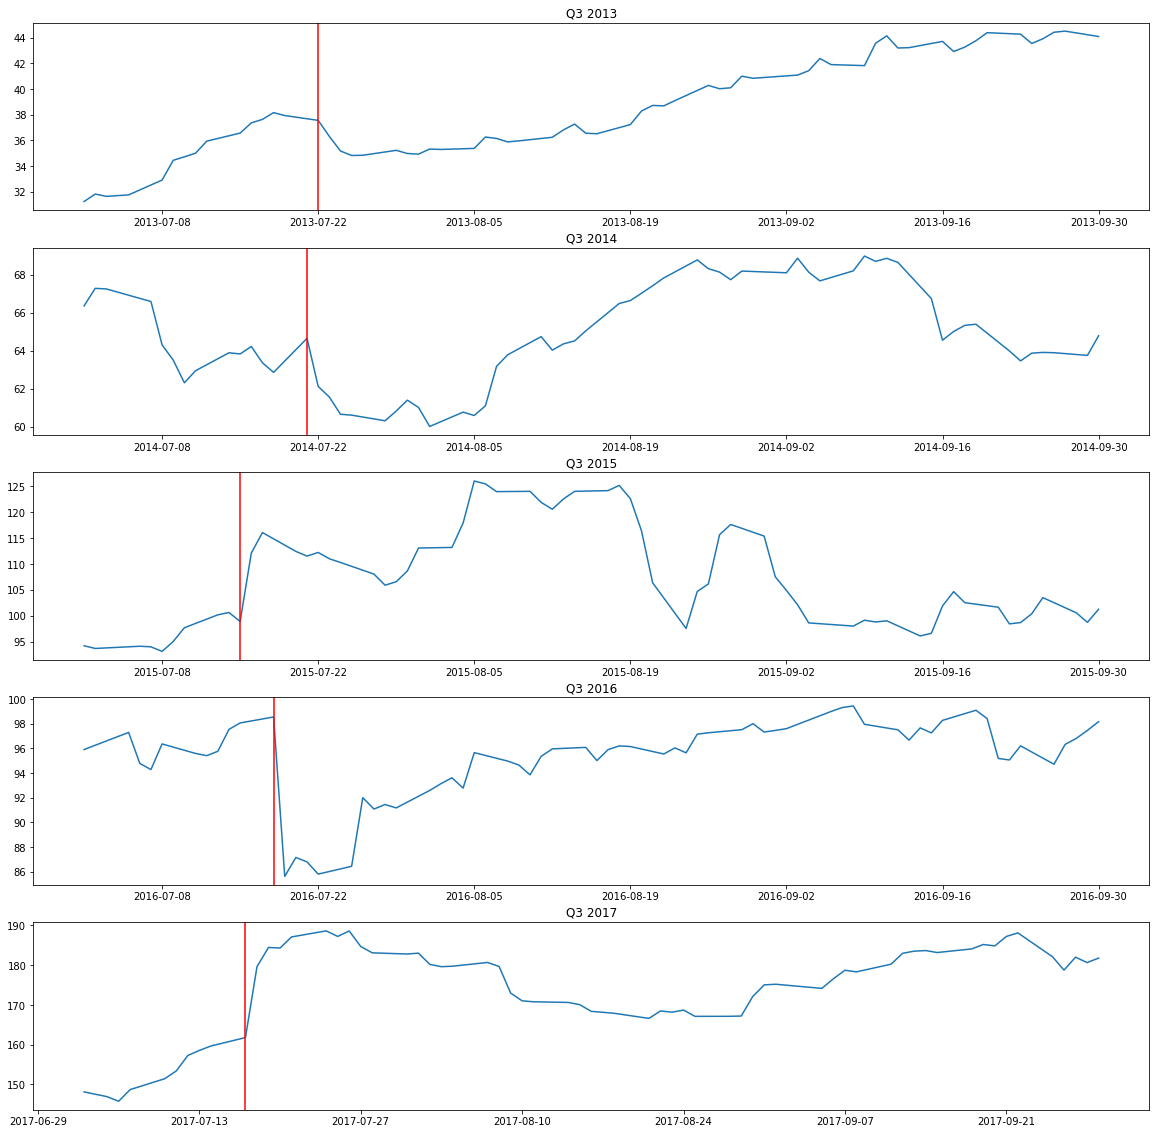

In [345]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5, 1, 1)
plt.plot(Q32013)
plt.title('Q3 2013')
plt.axvline(x="2013-07-22", color='r')

plt.subplot(5, 1, 2)
plt.plot(Q32014)
plt.title('Q3 2014')
plt.axvline(x="2014-07-21", color='r')

plt.subplot(5, 1, 3)
plt.plot(Q32015)
plt.title('Q3 2015')
plt.axvline(x="2015-07-15", color='r')

plt.subplot(5, 1, 4)
plt.plot(Q32016)
plt.title('Q3 2016')
plt.axvline(x="2016-07-18", color='r')

plt.subplot(5, 1, 5)
plt.plot(Q32017)
plt.title('Q3 2017')
plt.axvline(x="2017-07-17", color='r')

plt.show()

##### Fourth Quater

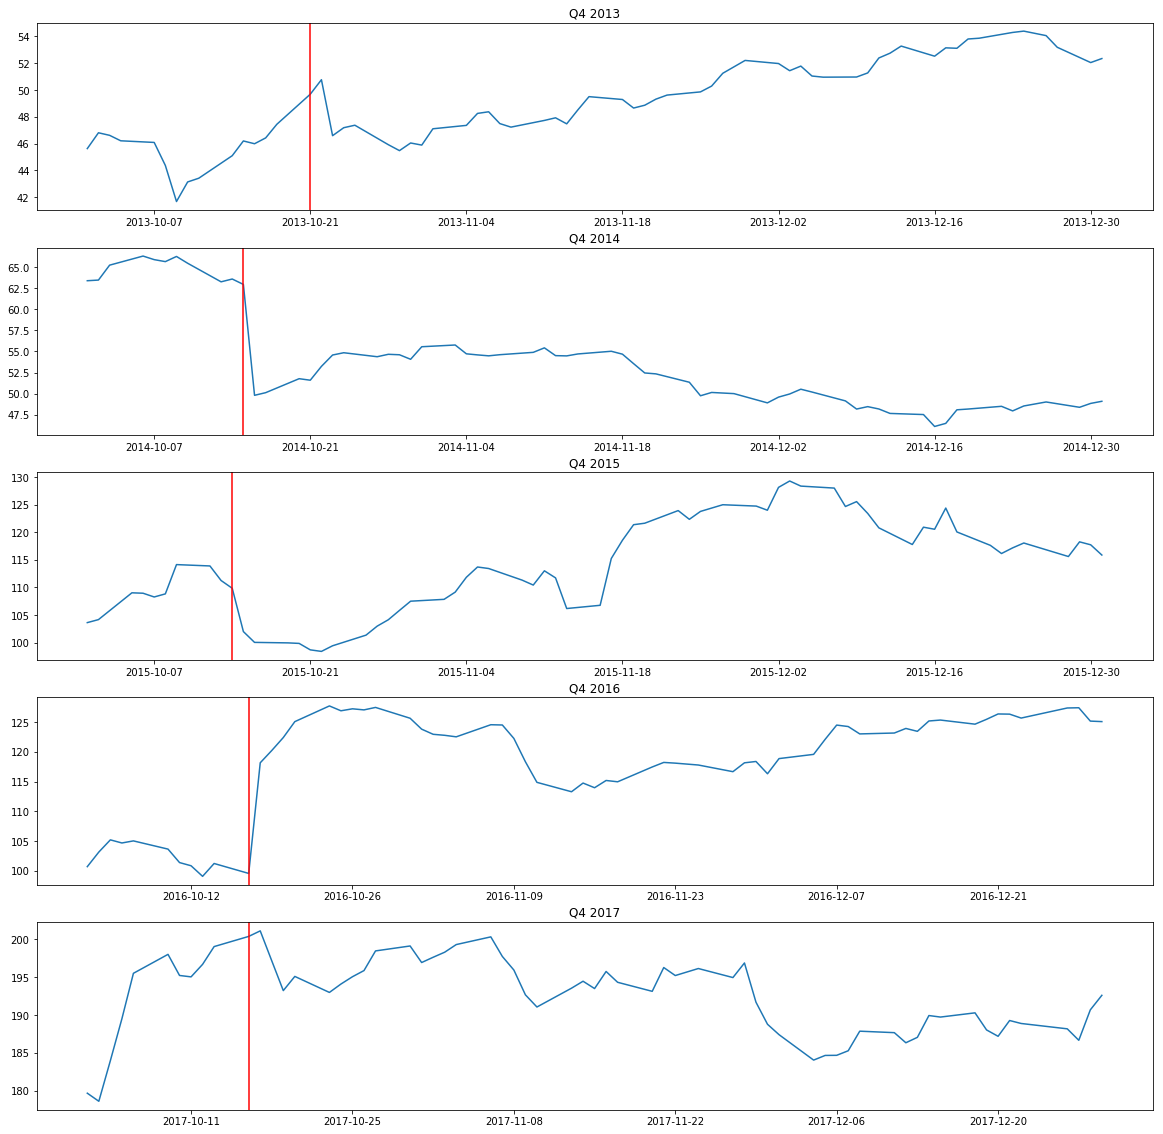

In [346]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5, 1, 1)
plt.plot(Q42013)
plt.title('Q4 2013')
plt.axvline(x="2013-10-21", color='r')

plt.subplot(5, 1, 2)
plt.plot(Q42014)
plt.title('Q4 2014')
plt.axvline(x="2014-10-15", color='r')

plt.subplot(5, 1, 3)
plt.plot(Q42015)
plt.title('Q4 2015')
plt.axvline(x="2015-10-14", color='r')

plt.subplot(5, 1, 4)
plt.plot(Q42016)
plt.title('Q4 2016')
plt.axvline(x="2016-10-17", color='r')

plt.subplot(5, 1, 5)
plt.plot(Q42017)
plt.title('Q4 2017')
plt.axvline(x="2017-10-16", color='r')

plt.show()

Here I have graphed each quater. Again there is no evident trend into which quater performs the strongest.
However I have also graphed the realease dates of the previous quaters earnings (eg in Q1 of 2013, netflix release their quaterly earnings of Q4 from 2014) 
which I found here: https://ir.netflix.com/quarterly-earnings
My aim was to see if and how these effected the stocks performance.

##### Finding #5

From the visualisations it is clear to see that the company's quaterly earnings release has a major bearing on the stocks performance. 18/20 releases had an immediate effect on the stock price withe the only 2 exceptions being Q4 2013 and Q4 2017.
Without a doubt the publication of quaterly earnings has a major effect on the stocks performance, and I would gess that it is one of the main influences on it.

### Possible Further Analysis

Would include researching other influences on the stocks performance, this would involve bringing in other datasets.
Some that spring to mind are:
- Total & Active user counts, vs Stock Price.
- Movie's Rating and Budgets vs Stock Price. I think this would be a good one, as it would be interesting to see if the is a relationship between the increase value Netflix and better and bigger movies/shows being made available on their services.